In [5]:
!pip install gspread oauth2client scikit-learn seaborn matplotlib

import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
json_keyfile_path = '/content/drive/MyDrive/quiet-result-446614-q5-9599a5a60421.json'  # Use the uploaded JSON file path

# Authenticate using the service account credentials
creds = ServiceAccountCredentials.from_json_keyfile_name(json_keyfile_path, scope)
gc = gspread.authorize(creds)

# Open your Google Sheet by key
spreadsheet_key = "1tyxACc95GD88T2Me_xhktYbc14P6-BBZkOWlT7MUaeU"
sh = gc.open_by_key(spreadsheet_key)

# Select the first sheet in the spreadsheet
worksheet = sh.sheet1

# Fetch all the data from the sheet and load it into a Pandas DataFrame
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])  # Assuming first row has column headers

# Inspect the DataFrame
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,,,
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,,,
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,,,,


In [7]:
print(df.columns)


Index(['id', 'subject', 'body', 'answer', 'type', 'queue', 'priority',
       'language', 'business_type', 'tag_1', 'tag_2', 'tag_3', 'tag_4',
       'tag_5', 'tag_6', 'tag_7', 'tag_8', 'tag_9'],
      dtype='object')


In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming your DataFrame is named 'df' and the column is 'answer'

# 1. Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# 2. Fit the vectorizer to the 'answer' column
vectorizer.fit(df['answer'].astype(str))

# 3. Get the vocabulary (feature names)
feature_names = vectorizer.get_feature_names_out()

# 4. Create an empty list to store TF-IDF values for each answer
all_tfidf_values = []

# 5. Iterate through each answer and calculate TF-IDF
for i, answer in enumerate(df['answer'].astype(str)):
    # Transform the answer into TF-IDF representation
    tfidf_vector = vectorizer.transform([answer])

    # Get the non-zero values and their corresponding feature indices
    feature_indices = tfidf_vector.nonzero()[1]
    tfidf_scores = tfidf_vector[0, feature_indices].toarray()[0]

    # Create a dictionary for the current answer's TF-IDF values
    answer_tfidf_values = dict(zip(feature_names[feature_indices], tfidf_scores))

    # Add the answer index and TF-IDF values to the list
    all_tfidf_values.append({'Answer Index': i, **answer_tfidf_values})

# 6. Create a Pandas DataFrame from the list of TF-IDF values
tfidf_df = pd.DataFrame(all_tfidf_values).fillna(0)  # Fill NaN with 0 for words not present

# 7. Set 'Answer Index' as the index of the DataFrame
tfidf_df.set_index('Answer Index', inplace=True)

# 8. Display the DataFrame
tfidf_df.head()

,access,affecting,all,and,appreciated,are,as,assist,available,begin,...,obtenez,quelle,anciennes,cópia,associées,explication,créer,déroulant,enregistrez,personnalisez
Answer Index,,,,,,,,,,,,,,,,,,,,,
0,0.099792,0.105505,0.083687,0.252205,0.130385,0.122291,0.171123,0.075952,0.093211,0.109702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.082735,0.099735,0.000000,0.000000,0.056393,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035850,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.decomposition import PCA

# Reduce to 2 components (for visualization or clustering)
pca = PCA(n_components=2)
reduced_tfidf = pca.fit_transform(tfidf_df)

# Create a DataFrame with reduced dimensions
reduced_tfidf_df = pd.DataFrame(reduced_tfidf, columns=['PC1', 'PC2'], index=tfidf_df.index)

In [42]:
from sklearn.cluster import KMeans

# Apply KMeans with 3 clusters (adjust as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(tfidf_df)  # Or reduced_tfidf_df if using PCA

# Add cluster labels to your original DataFrame
df['cluster'] = clusters

In [43]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_df)  # Or reduced_tfidf_df

# Find the most similar answers to a specific answer (e.g., answer with index 0)
similarity_scores = similarity_matrix[0]
most_similar_indices = similarity_scores.argsort()[-2:-1][::-1]  # Exclude the answer itself

In [44]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA with 5 topics (adjust as needed)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_df)

# Get the topic distribution for each answer
topic_distribution = lda.transform(tfidf_df)

In [45]:
from sklearn.cluster import KMeans

# 1. Determine the optimal number of clusters (e.g., using the Elbow Method)
# ... (Code for Elbow Method - see previous responses if needed) ...

# 2. Apply KMeans clustering with the chosen number of clusters (e.g., 3)
num_clusters = 3  # Replace with your optimal number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)  # For reproducibility
cluster_labels = kmeans.fit_predict(tfidf_df)

# 3. Add the cluster labels to your original DataFrame
df['cluster'] = cluster_labels

# 4. (Optional) Analyze the clusters and assign meaningful labels
# ... (Code to analyze clusters - see previous responses for suggestions) ...

In [46]:
# 1. Analyze clusters and assign meaningful labels
for cluster_id in df['cluster'].unique():
    print(f"Cluster {cluster_id}:")

    # Get the answers in the current cluster
    cluster_answers = df[df['cluster'] == cluster_id]['answer'].astype(str)

    # (a) Print some representative answers from the cluster
    print("Representative answers:")
    for answer in cluster_answers.sample(min(5, len(cluster_answers))):  # Print up to 5 answers
        print(answer)
        print("-" * 20)  # Separator

    # (b) Find the most frequent words in the cluster
    from collections import Counter
    all_words = ' '.join(cluster_answers).split()
    word_counts = Counter(all_words)
    print("Most frequent words:", word_counts.most_common(10))  # Print top 10 words

    # (c) (Optional) Assign a meaningful label to the cluster based on analysis
    # Example:
    # if cluster_id == 0:
    #     cluster_label = "Account Issues"
    # elif cluster_id == 1:
    #     cluster_label = "Technical Problems"
    # ...
    # df.loc[df['cluster'] == cluster_id, 'cluster_label'] = cluster_label

    print("\n")  # Add some spacing between clusters

Cluster 1:
Representative answers:
Subject: Re: Intermittent Connectivity Issues Report


Dear <name>,


Thank you for reaching out. To address the connectivity issues with your Cisco Router ISR4331, please ensure that your firmware is updated to the latest version, as outdated versions can lead to performance problems. Additionally, perform a network settings review and ensure proper configuration. For further assistance or detailed guidance, feel free to contact our support team. We're here to help!


Best regards,
Customer Support
--------------------
Dear <name>,


Thank you for getting in touch with us concerning the email configuration challenge faced by your client, <name>. We acknowledge the urgency and significance of rectifying this matter for efficient operations.


To help with the Outlook integration issue, we will assign a technical expert to reach out to <name> directly using the provided number <tel_num> for further details. They will collaborate closely to quickly reso

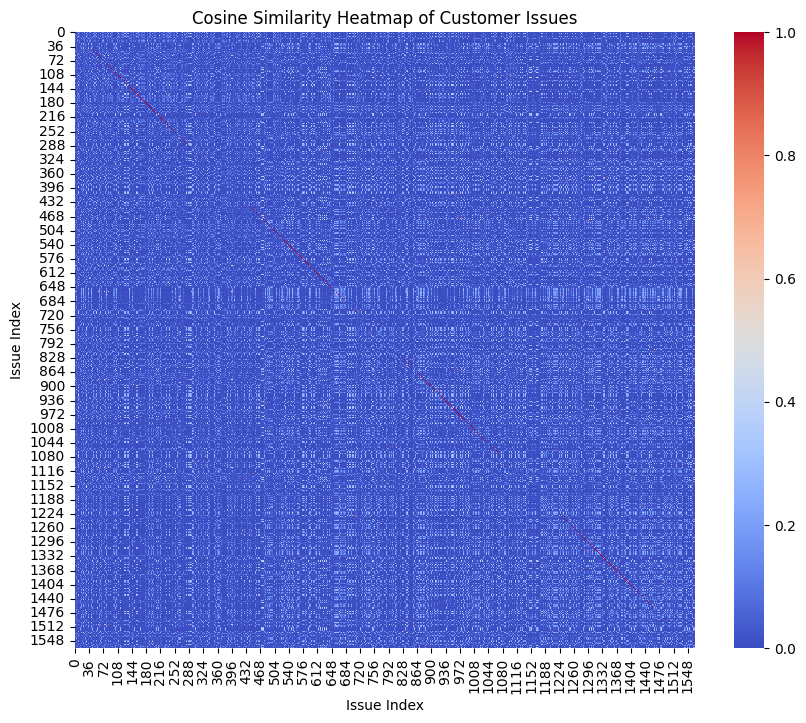

,body,cluster
0,"Dear Customer Support Team, We are experiencin...",2
1,"Dear Customer Support,<br><br>I hope this mess...",2
2,"Hallo, wir haben severe Datenverluste in MySQL...",0
3,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...",0
4,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...",1


In [10]:
plt.figure(figsize=(10, 8))

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)

# Generate the heatmap
sns.heatmap(similarity_matrix, cmap='coolwarm', annot=False)

plt.title('Cosine Similarity Heatmap of Customer Issues')
plt.xlabel('Issue Index')
plt.ylabel('Issue Index')
plt.show()

# Inspect clusters
df[[column_name, 'cluster']].head()

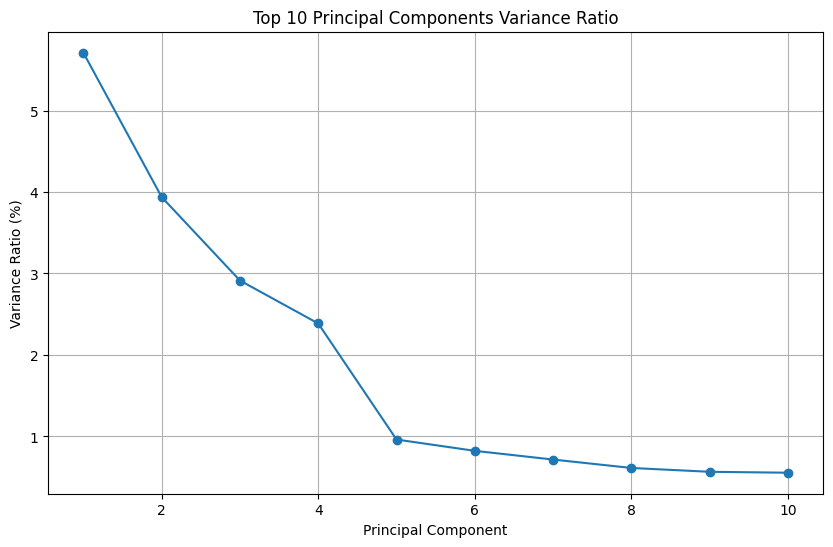

Principal Component 1: 5.71% variance
Principal Component 2: 3.94% variance
Principal Component 3: 2.91% variance
Principal Component 4: 2.39% variance
Principal Component 5: 0.96% variance
Principal Component 6: 0.82% variance
Principal Component 7: 0.72% variance
Principal Component 8: 0.61% variance
Principal Component 9: 0.57% variance
Principal Component 10: 0.55% variance


In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you already have your text data in a DataFrame column named 'body'
# Example:
# df = pd.DataFrame({'body': ['your text data here', 'more text data', ...]})

# 1. Apply TF-IDF to vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['body'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# 2. Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Reduce to 10 components
pca.fit(tfidf_df)  # Fit PCA on the TF-IDF data

# 3. Plot the variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), pca.explained_variance_ratio_ * 100, marker='o', linestyle='-')
plt.title('Top 10 Principal Components Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio (%)')
plt.grid(True)
plt.show()

# 4. Get the variance for each component
variance_per_component = pca.explained_variance_ratio_ * 100

# Print the variance for each component
for i, variance in enumerate(variance_per_component):
    print(f"Principal Component {i + 1}: {variance:.2f}% variance")

In [40]:
from sklearn.decomposition import PCA

# Assuming 'tfidf_df' is your DataFrame with TF-IDF values
# Replace 'tfidf_df' with the actual name of your DataFrame if it's different.

# Create a PCA object with 3 components
pca = PCA(n_components=3)

# Fit the PCA model to your data
pca.fit(tfidf_df)

# Transform your data to the lower-dimensional space
principal_components = pca.transform(tfidf_df)

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

pca_df.head()

,PC1,PC2,PC3
0,-0.165739,0.527520,-0.027509
1,-0.139883,0.460098,-0.024611
2,-0.309536,-0.203443,-0.010855
3,-0.322116,-0.211139,-0.015516
4,0.179414,-0.045781,-0.095837


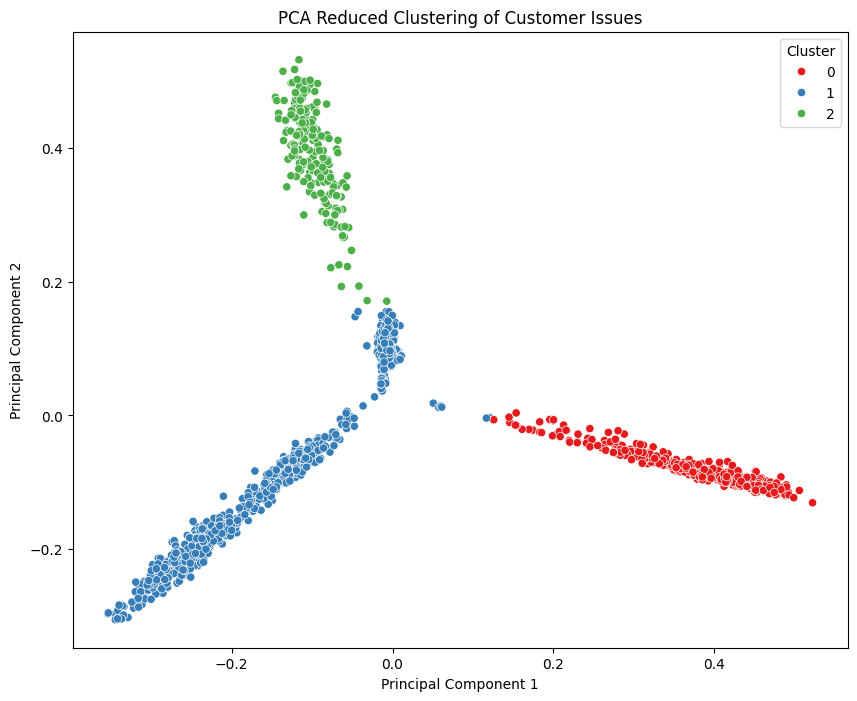

In [11]:

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Apply TF-IDF to vectorize customer issues (already done above)

# Assuming you already have tfidf_matrix, df, and vectorizer from previous steps

# Step 2: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_components = pca.fit_transform(tfidf_matrix.toarray())

# Step 3: Perform KMeans clustering on the reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
df['pca_cluster'] = kmeans_pca.fit_predict(pca_components)

# Step 4: Visualize the clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=df['pca_cluster'], palette='Set1')
plt.title('PCA Reduced Clustering of Customer Issues')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

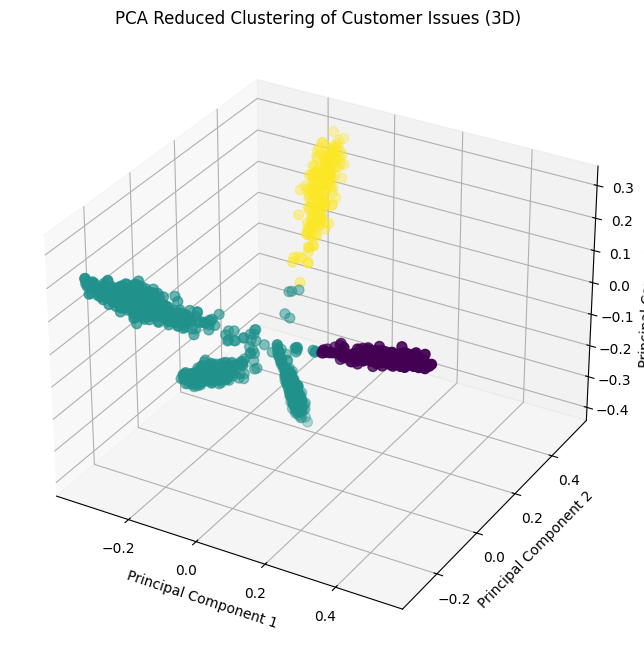

In [12]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
import seaborn as sns
import numpy as np

# ... (Previous code for TF-IDF and data loading) ...

# Step 2: Apply PCA for dimensionality reduction to 3 components
pca = PCA(n_components=3)  # Reduce to 3 components for 3D visualization
pca_components = pca.fit_transform(tfidf_matrix.toarray())

# Step 3: Perform KMeans clustering on the 3D reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
df['pca_cluster'] = kmeans_pca.fit_predict(pca_components)

# Step 4: Visualize the clusters in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Scatter plot for 3D PCA data
ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2],
           c=df['pca_cluster'], cmap='viridis', s=50)  # Color by cluster

# Add titles and labels
ax.set_title('PCA Reduced Clustering of Customer Issues (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

In [13]:
# Install TensorFlow Hub
!pip install tensorflow-hub tensorflow

import tensorflow_hub as hub
import numpy as np

# Load the Universal Sentence Encoder model
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_model = hub.load(model_url)

# Embed the 'answer' column from your DataFrame
def embed_answers(answers):
    return use_model(answers.tolist()).numpy()

# Embed answers
df['answer_embeddings'] = list(embed_answers(df['answer'].astype(str)))

# Example: Check the first few embeddings
df['answer_embeddings'].head()


,answer_embeddings
0,"[-0.04031415, -0.003116432, -0.02896288, 0.041..."
1,"[-0.019622361, -0.05817126, -0.03819256, -0.03..."
2,"[-0.051605854, -0.024957169, -0.050535697, 0.0..."
3,"[-0.057427194, -0.04620377, 0.009197802, 0.058..."
4,"[-0.045072265, -0.045792013, -0.006725886, 0.0..."


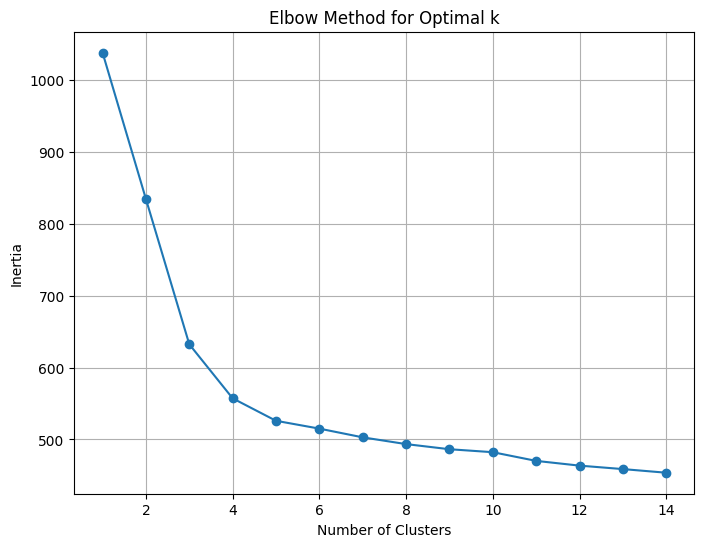

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert embeddings list to numpy array for KMeans
embeddings = np.array(df['answer_embeddings'].to_list())

# Use the elbow method to find the optimal number of clusters
inertias = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(embeddings)
    inertias.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [15]:
# Apply KMeans with the chosen optimal number of clusters (e.g., k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42).fit(embeddings)
df['cluster'] = kmeans.labels_

# Inspect clusters
df['cluster'].value_counts()


,count
cluster,
0,397
3,379
4,304
1,257
2,229


In [16]:
# Assuming you have 'df' which contains your data and 'pca_components' from PCA:
import pandas as pd  # Make sure pandas is imported

# Create pca_df using pandas DataFrame
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])  # Assuming 3 components
pca_df['cluster'] = kmeans.labels_

print(pca_df.head())

        PC1       PC2       PC3  cluster
0 -0.002666  0.120310 -0.308759        4
1 -0.004218  0.085339 -0.211112        1
2  0.174523 -0.021835 -0.003553        0
3  0.412363 -0.105917  0.100837        0
4 -0.124606 -0.082462 -0.119077        2


In [17]:
# Assuming you have 'df' which contains your data and 'pca_components' from PCA:
import pandas as pd  # Make sure pandas is imported
from sklearn.cluster import KMeans  # Import KMeans for clustering

# Create pca_df using pandas DataFrame
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])  # Assuming 3 components
kmeans = KMeans(n_clusters=3, random_state=42)  # Initialize KMeans with desired parameters
pca_df['cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2', 'PC3']])  # Fit and predict clusters

print(pca_df.head())

# 1. Analyze Clusters and Finalize Issue Categories:
for cluster in pca_df['cluster'].unique():
    print(f"Cluster {cluster}:")
    cluster_data = df[pca_df['cluster'] == cluster]  # Get original data points for this cluster

    # Analyze cluster_data to identify common themes and keywords
    # Example: Print top 5 most frequent words in 'body' column
    from collections import Counter
    words = ' '.join(cluster_data['body'].astype(str)).split()
    print(Counter(words).most_common(5))

    # Based on analysis, manually assign an issue category to the cluster
    # Example:
    if cluster == 0:
        issue_category = "Account Issues"
    elif cluster == 1:
        issue_category = "Technical Problems"
    elif cluster == 2:
        issue_category = "Billing Inquiries"

    pca_df.loc[pca_df['cluster'] == cluster, 'issue_category'] = issue_category

# 2. Create Templates using ChatGPT (Example):
issue_templates = {
    "Account Issues": "Dear [Customer Name], We understand you're having trouble with your account. Please provide more details so we can assist you.",
    "Technical Problems": "Dear [Customer Name], We're sorry you're experiencing technical difficulties. Please try [troubleshooting steps] or contact us for further support.",
    "Billing Inquiries": "Dear [Customer Name], We're happy to help with your billing inquiry. Please provide your [account details] so we can investigate."
}

# 3. Store Variables for Injection:
issue_variables = {
    "Account Issues": {
        "Issue Type": "Account Problem",
        "Steps to Follow": "Check your login credentials, reset your password, or contact customer support."
    },
    "Technical Problems": {
        "Issue Type": "Technical Glitch",
        "Steps to Follow": "Restart your device, check your internet connection, or clear your browser cache."
    },
    "Billing Inquiries": {
        "Issue Type": "Billing Question",
        "Steps to Follow": "Review your recent invoices, check your payment methods, or contact our billing department."
    }
}

# 4. Example Usage:
def get_response_template(issue_category, customer_name):
    template = issue_templates[issue_category]
    variables = issue_variables[issue_category]

    # Inject variables into template
    template = template.replace("[Customer Name]", customer_name)
    template = template.replace("[troubleshooting steps]", variables["Steps to Follow"])
    template = template.replace("[account details]", variables["Steps to Follow"]) #Billing and Account could be combined and have its own steps

    return template

# Example usage:
customer_issue = "I can't log in to my account."
# Assume you have a function to predict the cluster/issue_category for the customer_issue
predicted_category = "Account Issues"
response = get_response_template(predicted_category, "John Doe")
print(response)

        PC1       PC2       PC3  cluster
0 -0.002666  0.120310 -0.308759        1
1 -0.004218  0.085339 -0.211112        1
2  0.174523 -0.021835 -0.003553        0
3  0.412363 -0.105917  0.100837        0
4 -0.124606 -0.082462 -0.119077        1
Cluster 1:
[('de', 4773), ('a', 1839), ('para', 1778), ('que', 1764), ('to', 1468)]
Cluster 0:
[('zu', 1190), ('und', 1072), ('die', 987), ('Sie', 804), ('um', 746)]
Cluster 2:
[('de', 1820), ('pour', 721), ('des', 669), ('et', 667), ('à', 646)]
Dear John Doe, We understand you're having trouble with your account. Please provide more details so we can assist you.


In [18]:

# 5. New Customer Interaction Scenario:
new_customer_issue = "My internet is down, and I can't access the website."

# 6. Predict Issue Category (You would need a function for this in a real system):
# In this example, we assume a function called 'predict_issue_category' exists:
# predicted_category = predict_issue_category(new_customer_issue)
# For now, let's manually assign the category:
predicted_category = "Technical Problems"

# 7. Generate Automated Response:
customer_name = "Jane Smith"  # Get customer name from your system
response = get_response_template(predicted_category, customer_name)
print(response)

Dear Jane Smith, We're sorry you're experiencing technical difficulties. Please try Restart your device, check your internet connection, or clear your browser cache. or contact us for further support.


In [19]:
!pip install googletrans==4.0.0-rc1

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
from googletrans import Translator

# Initialize the Google Translate API client
translator = Translator()

# Calculate pairwise cosine similarity for each answer embedding
similarity_matrix = cosine_similarity(embeddings)

# Function to get top N similar answers within a specific cluster and translate them to English
def get_top_similar_answers_in_english(cluster_id, n=10):
    cluster_indices = df[df['cluster'] == cluster_id].index
    # Extract similarities for the given cluster
    similarities = similarity_matrix[cluster_indices]

    # Get the top N most similar answers excluding the answer itself
    top_n_indices = np.argsort(similarities[0])[-n-1:-1][::-1]

    # Retrieve the top similar answers
    top_similar_answers = df['answer'].iloc[top_n_indices].tolist()

    # Translate the answers to English using Google Translate
    translated_answers = [translator.translate(answer, src='de', dest='en').text for answer in top_similar_answers]

    return translated_answers

# Example: Get top 10 similar answers from cluster 0 and translate them to English
similar_answers_in_english = get_top_similar_answers_in_english(cluster_id=0, n=10)

# Display the translated answers
for idx, answer in enumerate(similar_answers_in_english):
    print(f"Answer {idx+1} in English: {answer}\n")


Answer 1 in English: Hello, thank you for registering.Please make sure that your MySQL backups are up to date.For the immediate restoration of MySQL data, carry out recovery tools or consult a MySQL expert for tailor-made support.If the problem continues, you consider restoring your last known good backup.Do not hesitate to contact us for further support.

Answer 2 in English: Hello, thank you for registering.Please make sure that your MySQL backups are up to date.For immediate MySQL data recovery, you can recover or consult a MySQL expert for tailor-made support.If the problem continues, you consider restoring your last known good backup.Do not hesitate to contact us for further support.

Answer 3 in English: Hello, thank you very much for your contact.Please make sure that your MySQL backups are up to date.For immediate MySQL data recovery, you can recover or consult a MySQL expert for tailor-made support.If the problem continues, you consider restoring your last known functioning ba

In [26]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'df' already has a 'cluster' column:
# (Make sure you have run the cell that creates this column)

# Calculate pairwise cosine similarity for each answer embedding
similarity_matrix = cosine_similarity(embeddings)

# Function to get top N similar answers within a specific cluster
def get_top_similar_answers(cluster_id, n=10):
    # Now 'df' should have the 'cluster' column, adding it here from pca_df
    df['cluster'] = pca_df['cluster']
    cluster_indices = df[df['cluster'] == cluster_id].index
    # Extract similarities for the given cluster
    similarities = similarity_matrix[cluster_indices]

    # Get the top N most similar answers excluding the answer itself
    top_n_indices = np.argsort(similarities[0])[-n-1:-1][::-1]

    # Return the top similar answers as a list
    return df['answer'].iloc[top_n_indices].tolist()

# Example: Get top 10 similar answers from cluster 0
similar_answers = get_top_similar_answers(cluster_id=0, n=10)
similar_answers

['Hallo, vielen Dank für Ihre Kontaktaufnahme. Bitte stellen Sie sicher, dass Ihre MySQL-Backups auf dem neuesten Stand sind. Für sofortige MySQL-Datenwiederherstellung führen Sie Wiederherstellungstools aus oder konsultieren Sie einen MySQL-Experten für maßgeschneiderte Unterstützung. Wenn das Problem weiterhin besteht, ziehen Sie in Betracht, von Ihrem letzten bekannten funktionierenden Backup wiederherzustellen. Zögern Sie nicht, uns für weitere Unterstützung zu kontaktieren.',
 'Hallo, danke, dass Sie sich gemeldet haben. Bitte stellen Sie sicher, dass Ihre MySQL-Backups auf dem neuesten Stand sind. Für die sofortige Wiederherstellung von MySQL-Daten führen Sie Wiederherstellungstools aus oder konsultieren Sie einen MySQL-Experten für maßgeschneiderte Unterstützung. Wenn das Problem weiterhin besteht, ziehen Sie in Betracht, von Ihrem letzten bekannten guten Backup wiederherzustellen. Zögern Sie nicht, uns für weitere Unterstützung zu kontaktieren.',
 'Hallo, danke, dass Sie sich g

In [27]:
# Function to extract and display top similar answers for a given cluster in English
def display_similar_answers(cluster_id, n=10):
    # Get the top N similar answers
    similar_answers = get_top_similar_answers(cluster_id, n)

    # Print the results in English
    print(f"\nTop {n} similar answers in Cluster {cluster_id}:\n")
    for idx, answer in enumerate(similar_answers):
        print(f"Answer {idx+1}: {answer}\n")

# Example: Display top 5 similar answers from Cluster 1
display_similar_answers(cluster_id=1, n=5)



Top 5 similar answers in Cluster 1:

Answer 1: Dear <name>,


Thank you for contacting us regarding the critical network issue with your Cisco Router ISR4331. We understand the urgency and the impact it is having on your operations.


Our team is ready to assist with this high-priority incident. We recommend checking the router's firmware for updates which could resolve connectivity issues, and confirming that all cables and connections are secure. Additionally, restarting the router can help in some cases to restore network stability.


Please provide any error logs if available, which could help our analysis. Meanwhile, we have scheduled a specialist to contact <name>, your IT head, at <tel_num> today to discuss further steps and arrange a more in-depth investigation.


We are committed to resolving this issue swiftly and efficiently. Please let us know if there is any other assistance you require.


Kind regards,


<Service Desk Agent Name>
Service Support Team
<Company Name>

Answ